In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Describing a catergorical variable

In [2]:
df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


### Categorical variables
1. Year (ordinal)
2. Country (nominal)

### 1. Frequency Distributions

In [3]:
fd = pd.DataFrame(columns=["Country", "Frequency", "Relative_Frequency"])
for index, value in df.Country.value_counts().items():
    fd.loc[len(fd.index)+1] = [index, value, value/((df.shape)[0])]
fd

,Country,Frequency,Relative_Frequency
1,Japan,51,0.186131
2,USA,51,0.186131
3,Germany,50,0.182482
4,Canada,44,0.160584
5,Great Britain,43,0.156934
6,France,35,0.127737


In [4]:
["Total", fd["Frequency"].sum(), fd["Relative_Frequency"].sum()]

['Total', 274, 1.0]

### 2. Frequency Bar Charts

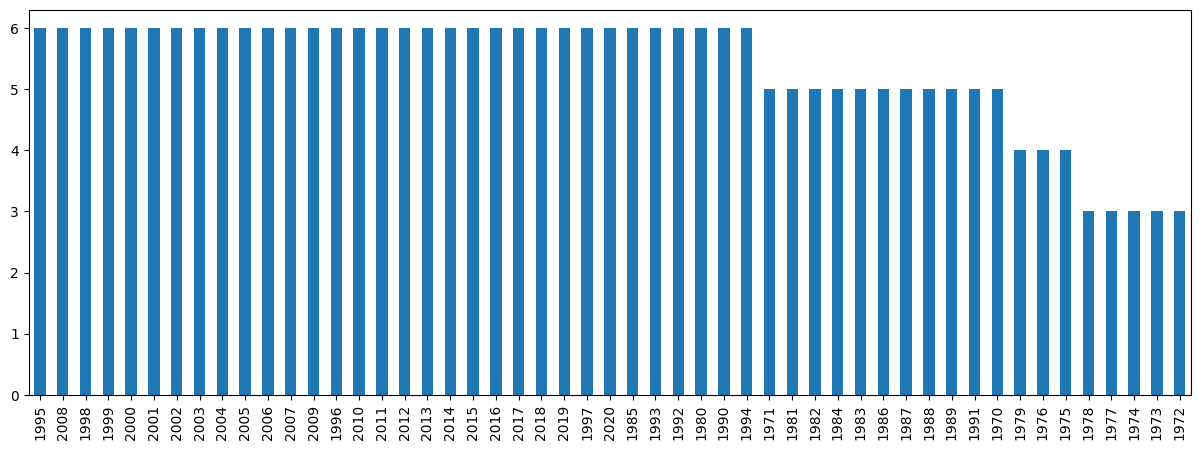

In [5]:
plt.figure(figsize=(15,5))
df.Year.value_counts().plot.bar(width=0.5,align='center')
plt.show()

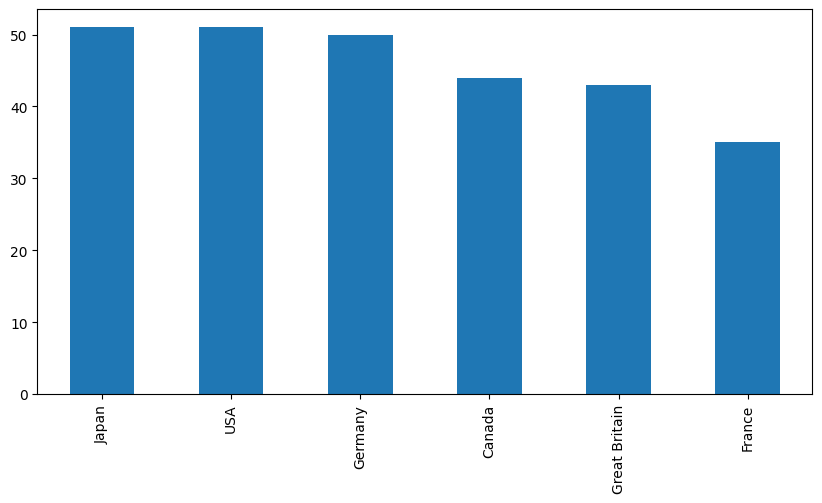

In [6]:
plt.figure(figsize=(10,5))
df.Country.value_counts().plot.bar(align='center')
plt.show()

### 3. Pie Charts

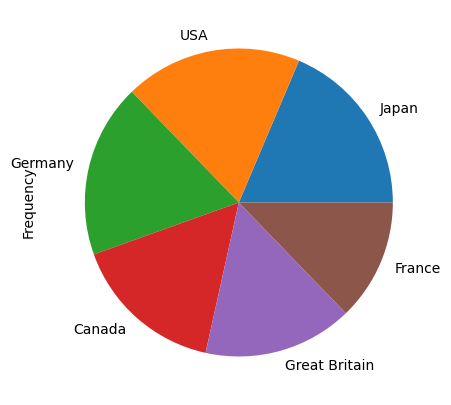

In [7]:
plt.figure(figsize=(5,5))
fd.Frequency.plot.pie(labels=fd.Country)
plt.show()

### 4. Contingency Table / Cross Table

In [8]:
pd.crosstab(df[df["Year"]<1980]['Year'], df['Country'], margins=True)

Country,Canada,France,Germany,Great Britain,Japan,USA,All
Year,,,,,,,
1970,0,1,1,1,1,1,5
1971,1,0,1,1,1,1,5
1972,0,0,1,0,1,1,3
1973,0,0,1,0,1,1,3
1974,0,0,1,0,1,1,3
1975,0,1,1,0,1,1,4
1976,1,0,1,0,1,1,4
1977,0,0,1,0,1,1,3
1978,0,0,1,0,1,1,3


### 5. Pareto Chart

In [9]:
#create DataFrame
data = pd.DataFrame({'count': list(fd.Frequency)}, index=fd.Country)
#sort DataFrame by count descending
data = data.sort_values(by='count', ascending=False)
#add column to display cumulative percentage
data['cumperc'] = data['count'].cumsum()/data['count'].sum()*100
#view DataFrame
data

,count,cumperc
Country,,
Japan,51,18.613139
USA,51,37.226277
Germany,50,55.474453
Canada,44,71.532847
Great Britain,43,87.226277
France,35,100.000000


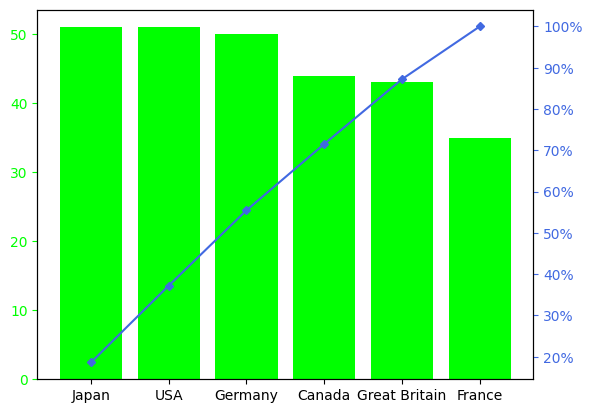

In [10]:
from matplotlib.ticker import PercentFormatter
#define aesthetics for plot
color1 = 'lime'
color2 = 'royalblue'
line_size = 4
#create basic bar plot
fig, ax = plt.subplots()
ax.bar(data.index, data['count'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(data.index, data['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

## Histograms

[]

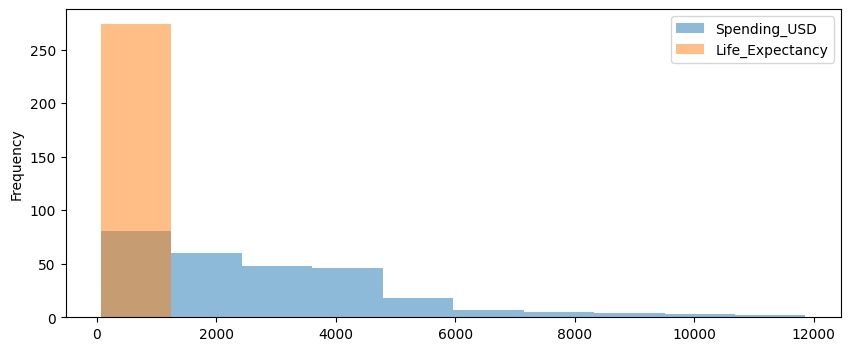

In [11]:
ax = df.plot.hist(column=["Spending_USD", "Life_Expectancy"], alpha=0.5, figsize=(10, 4))
plt.plot()

[]

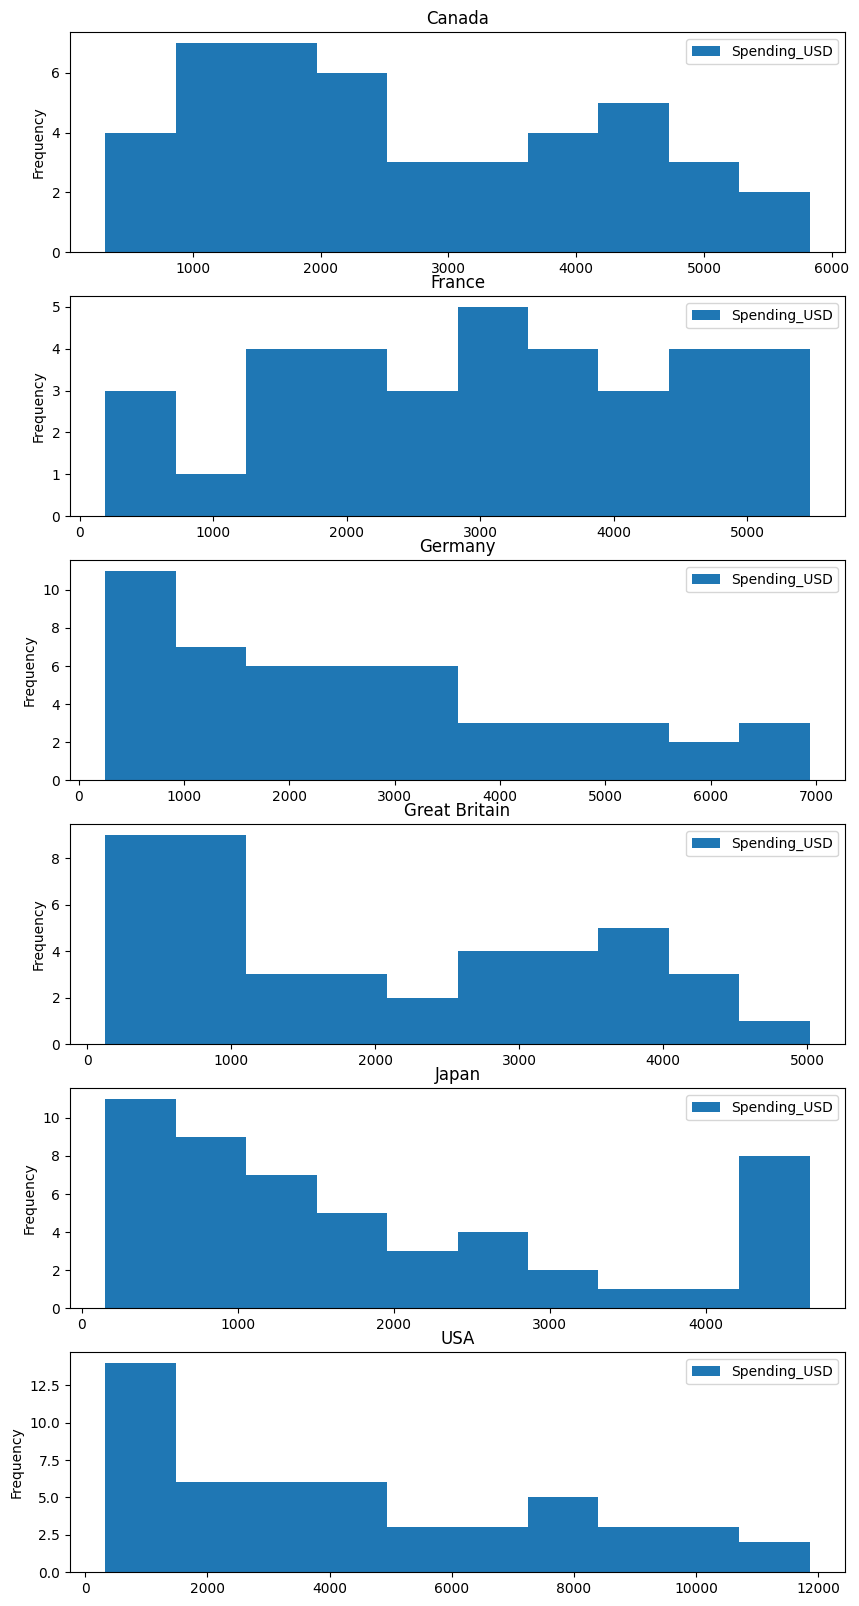

In [12]:
ax = df.plot.hist(column=["Spending_USD"], by="Country", figsize=(10, 20))
plt.plot()

[]

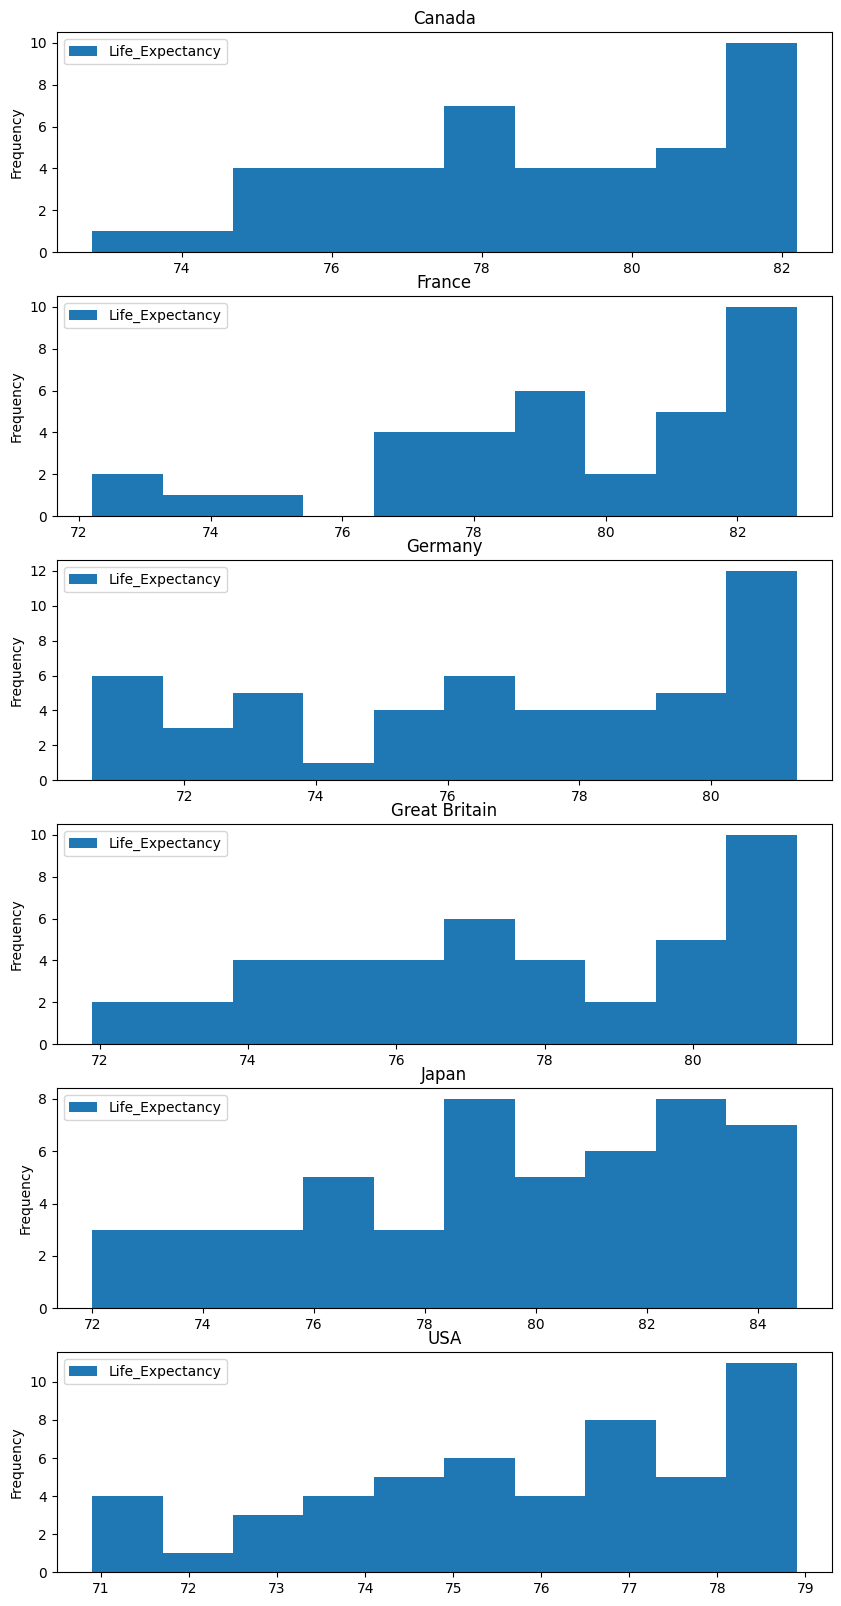

In [13]:
ax = df.plot.hist(column=["Life_Expectancy"], by="Country", figsize=(10, 20))
plt.plot()

## Boxplots

<AxesSubplot: xlabel='Spending_USD', ylabel='Country'>

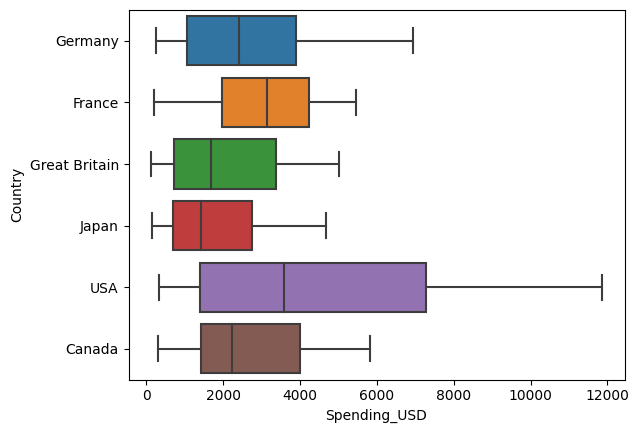

In [14]:
sns.boxplot(data=df, x="Spending_USD", y="Country")

<AxesSubplot: xlabel='Country', ylabel='Life_Expectancy'>

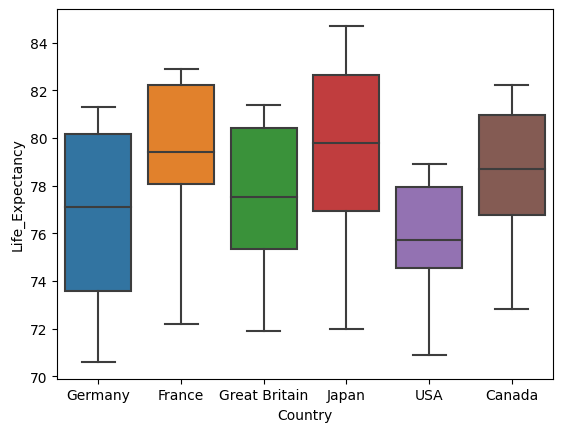

In [15]:
sns.boxplot(data=df, x="Country", y="Life_Expectancy")